In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Conv2D,MaxPooling2D,Dropout,Dense,Flatten

from tensorflow.keras.utils import to_categorical
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

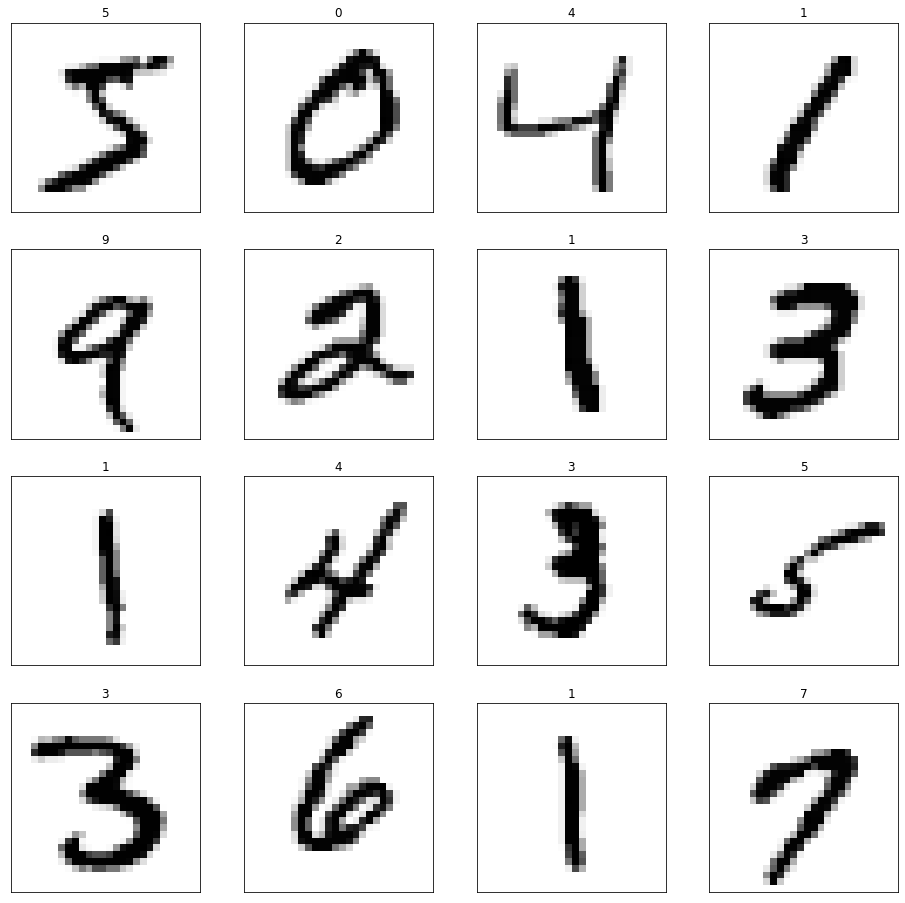

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,4,figsize=(16,16))
index=0
for axes in ax:
    for axis in axes:
        axis.imshow(X_train[index],cmap='Greys')
        axis.set_title(y_train[index])
        axis.set_xticks([])
        axis.set_yticks([])
        index+=1



In [14]:
X_train=X_train/255.0
X_test=X_test/255.0

In [15]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [16]:
Y_train=to_categorical(y_train, 10)
Y_test=to_categorical(y_test, 10)

In [17]:
Y_train.shape

(60000, 10)

In [20]:
model=Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


model.add(Dropout(0.2))

model.add(Flatten())


model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=20)


Epoch 1/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1885 - accuracy: 0.9418 - val_loss: 0.0567 - val_accuracy: 0.9809
Epoch 2/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.0371 - val_accuracy: 0.9876
Epoch 3/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.0338 - val_accuracy: 0.9878
Epoch 4/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 5/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0352 - val_accuracy: 0.9874
Epoch 6/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 7/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0292 -

In [21]:
model.save('HandWrittenDigitClassifier.model')

INFO:tensorflow:Assets written to: HandWrittenDigitClassifier.model\assets


In [5]:
model=tf.keras.models.load_model(r'C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\digits detection\HandWrittenDigitClassifier.model')

In [8]:
import numpy as np
Pred=model.predict(X_test[0].reshape(1,28,28,1))
Pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [9]:
import cv2
cv2.imshow("test",X_test[0])
cv2.waitKey(0) 

cv2.destroyAllWindows() 

In [10]:
np.where(Pred[0]>0.5)[0]

array([7], dtype=int64)

In [13]:
np.where(Pred[0]==np.max(Pred[0]))[0][0]

7